In [0]:
!wget https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Convolutional-Neural-Networks.zip

--2019-07-03 07:13:09--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Convolutional-Neural-Networks.zip
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.84.136
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.84.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 233354462 (223M) [application/zip]
Saving to: ‘P16-Convolutional-Neural-Networks.zip’

P16-Convolutional-N 100%[===================>] 222.54M  71.3MB/s    in 3.1s    

2019-07-03 07:13:13 (71.3 MB/s) - ‘P16-Convolutional-Neural-Networks.zip’ saved [233354462/233354462]



In [0]:
from zipfile import ZipFile 

file_name = "P16-Convolutional-Neural-Networks.zip"
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
    # extracting all the files 
    zip.extractall()
    # Closing the zip
    zip.close()

In [0]:
import os
print(os.getcwd())
os.chdir('/content/Convolutional_Neural_Networks/dataset')
print(os.getcwd())
os.listdir()

/content/Convolutional_Neural_Networks/dataset
/content/Convolutional_Neural_Networks/dataset


['training_set', 'test_set', 'single_prediction', '.DS_Store']

In [0]:
#Declaration of parameters needed for training and validation
train_data_dir =('training_set')
test_data_dir =('test_set')

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# Initialising the CNN
model = Sequential()

# 1st convolution and pooling payer
#Convolution Layer
model.add(Conv2D(32, 
                 (3, 3), 
                 activation = 'relu',
                 padding='same',
                 input_shape = (128, 128, 3)))
#Maxpooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))


# 2nd convolution and pooling payer
#Convolution Layer
model.add(Conv2D(32, 
                 (3, 3), 
                 padding='same',
                 activation = 'relu'))
#Maxpooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))


# 3rd convolution and pooling payer
#Convolution Layer
model.add(Conv2D(32, 
                 (3, 3), 
                 padding='same',
                 activation = 'relu'))
#Maxpooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))


#Flattening
model.add(Flatten())


# Fully Dense connection
model.add(Dense(64, 
                activation='relu'))

model.add(Dropout(p=0.6))

model.add(Dense(64, 
                activation='relu'))

model.add(Dense(64, 
                activation='relu'))

model.add(Dropout(p=0.3))

model.add(Dense(1, 
                activation='sigmoid'))


#Compile the model
adam= Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.6)`
W0703 07:29:37.673148 140585613363072 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.3)`


In [0]:
#Trainning Agementation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

#Test Agementation
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(test_data_dir,
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
epochs = 10
model.fit_generator(training_set,
                    steps_per_epoch = 8000,
                    epochs = epochs,
                    validation_data = test_set,
                    validation_steps = 2000) 

Epoch 1/10
8000/8000 [==============================] - 1894s 237ms/step - loss: 0.4877 - acc: 0.7569 - val_loss: 0.4119 - val_acc: 0.8296
Epoch 2/10
8000/8000 [==============================] - 1885s 236ms/step - loss: 0.3384 - acc: 0.8549 - val_loss: 0.4279 - val_acc: 0.8065
Epoch 3/10
8000/8000 [==============================] - 1900s 237ms/step - loss: 0.2806 - acc: 0.8836 - val_loss: 0.3942 - val_acc: 0.8437
Epoch 4/10
8000/8000 [==============================] - 1933s 242ms/step - loss: 0.2421 - acc: 0.9021 - val_loss: 0.3770 - val_acc: 0.8425
Epoch 5/10
8000/8000 [==============================] - 1922s 240ms/step - loss: 0.2091 - acc: 0.9164 - val_loss: 0.4078 - val_acc: 0.8201
Epoch 6/10
8000/8000 [==============================] - 1946s 243ms/step - loss: 0.1875 - acc: 0.9268 - val_loss: 0.3817 - val_acc: 0.8521
Epoch 7/10
8000/8000 [==============================] - 1945s 243ms/step - loss: 0.1720 - acc: 0.9334 - val_loss: 0.3639 - val_acc: 0.8523
Epoch 8/10
2499/8000 [=====

In [0]:
from keras.models import load_model
model.save("cats_and_dogs.h5")

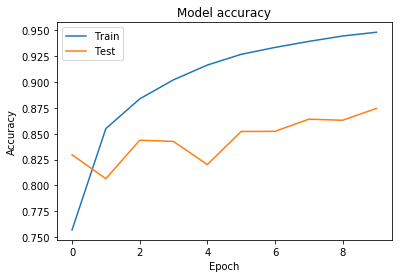

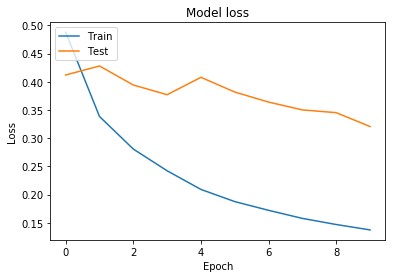

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.history
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# Part 3 - Making new predictions

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('./single_prediction/cat_or_dog_2.jpg', 
                            target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
    print(prediction)
else:
    prediction = 'cat'
    print(prediction)

cat


In [0]:
print('Train',model.history.history['acc'][9] * 100)
print('Test',model.history.history['val_acc'][9] * 100)

Train 94.81328125
Test 87.44487147177419
